# Multiple Linear Regression Canadian NASCAR

In [6]:
%reset
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Read in the RaceCarTiming.csv data

Top Qualifying Speeds by Track (21 tracks)

* Y = Top Qualifying Speed (MapleLeaf Cup Series)  
* X1=Bank (Degrees)  (Mean=19.31)
* X2=Track Length in Miles (Mean=1.522)
* X3= Normal Tires= 0 or A and Cold Weather Tires= 1 or B

* Cbank= mean centered Bank
* Clength = mean centered Length

In [8]:
speed=pd.read_csv('RaceCarTiming.csv')
speed

,Track,Bank,Length,TopQual,Cbank,Clength,Tires
0,Calabogie,24.0,1.54,197.48,4.69,0.018,A
1,CanadianTire,36.0,0.53,128.71,16.69,-0.992,A
2,Edenvale,14.0,2.00,187.43,-5.31,0.478,B
3,GrandBend,18.0,1.50,188.15,-1.31,-0.022,A
4,GreenAcres,24.0,1.37,173.80,4.69,-0.152,B
5,No31Air,31.0,2.50,210.36,11.69,0.978,A
6,HarewoodAcres,24.0,1.00,161.52,4.69,-0.522,A
7,OroStation,19.0,1.50,181.11,-0.31,-0.022,A
8,Shannonville,9.0,2.50,186.29,-10.31,0.978,B
9,StEugene,15.0,1.50,176.45,-4.31,-0.022,B


# Part 1:  Categorical Predictor

## Provide the fitted model for predicting y based on Clength (X1) and Tires (X3)

In [10]:
# Import ols from statsmodels
from statsmodels.formula.api import ols

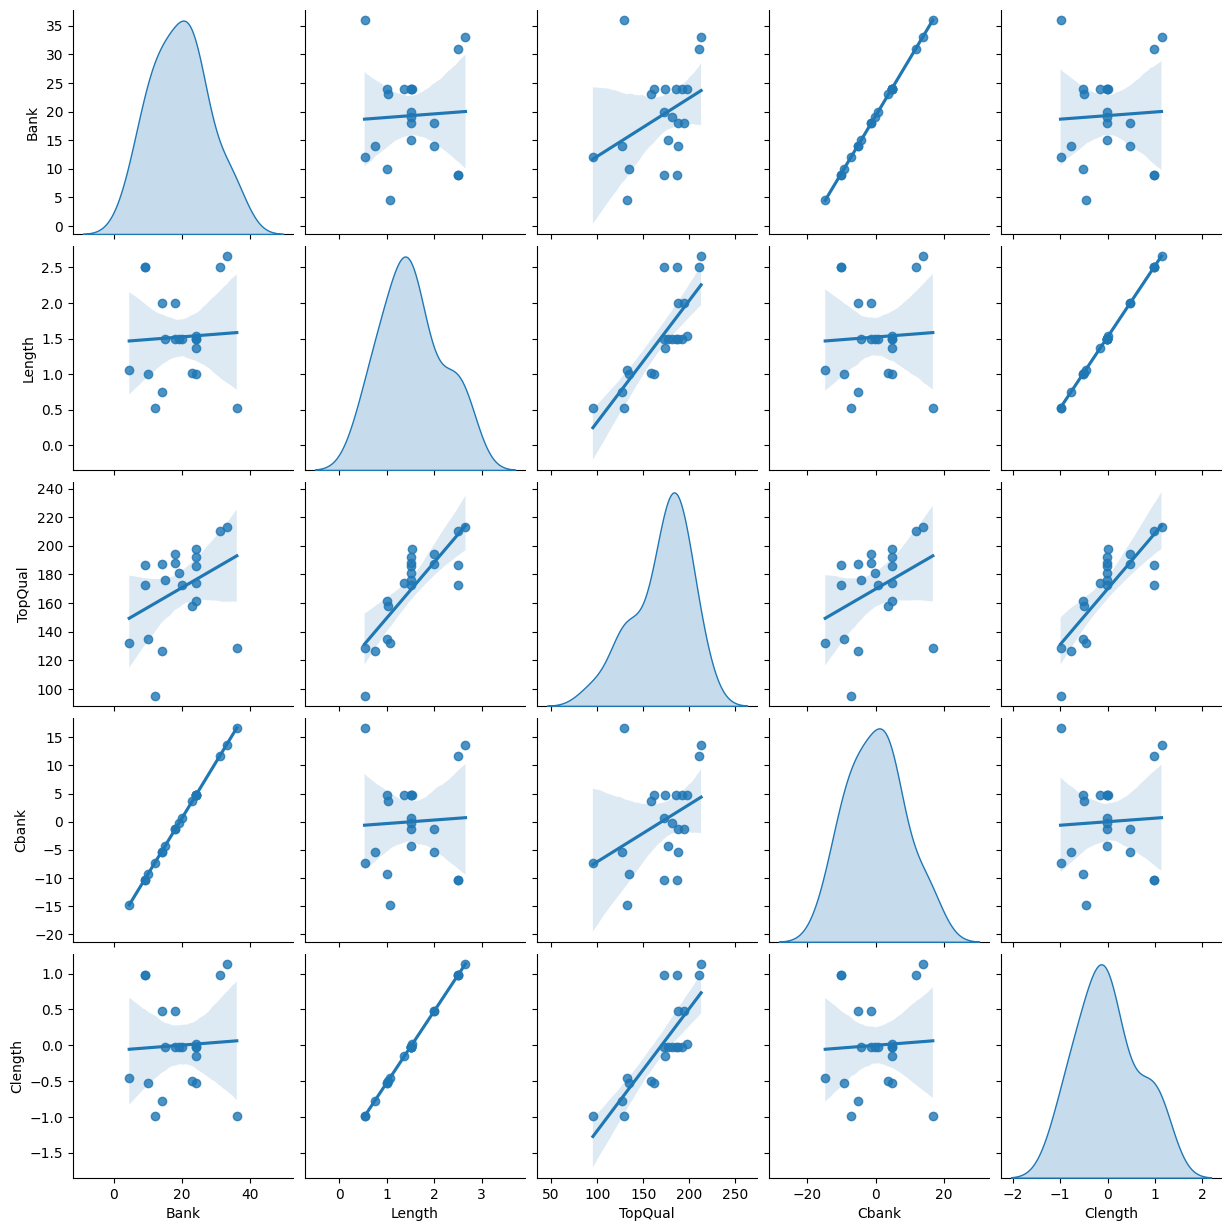

In [19]:
sns.pairplot(speed, kind='reg', diag_kind='kde')

In [14]:
model_X1andX3=ols('TopQual~Clength+Tires',data=speed)
resultsX1andX3=model_X1andX3.fit()
print(resultsX1andX3.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.746   
Dependent Variable: TopQual          AIC:                177.2507
Date:               2024-11-15 09:37 BIC:                180.3843
No. Observations:   21               Log-Likelihood:     -85.625 
Df Model:           2                F-statistic:        30.34   
Df Residuals:       18               Prob (F-statistic): 1.72e-06
R-squared:          0.771            Scale:              237.71  
-----------------------------------------------------------------
                Coef.   Std.Err.    t    P>|t|   [0.025   0.975] 
-----------------------------------------------------------------
Intercept      180.1716   4.8756 36.9536 0.0000 169.9283 190.4149
Tires[T.B]     -19.5770   6.7367 -2.9060 0.0094 -33.7302  -5.4237
Clength         38.7892   5.3769  7.2140 0.0000  27.4927  50.0857
-----------------------------------------------------------------
Omnibus:               0.48

In [42]:
print('TopQual = 180.1716 - 19.5770*Tires + 38.7892*Clength')

TopQual = 180.1716 - 19.5770*Tires + 38.7892*Clength


## Plot the regression model

Try seaborn's sns.lmplot (https://seaborn.pydata.org/generated/seaborn.lmplot.html)

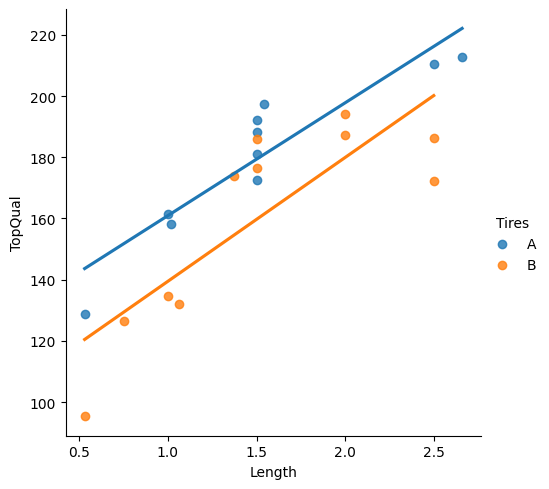

In [22]:
plt.clf
sns.lmplot(x='Length', y='TopQual', hue='Tires', data=speed, ci=None)
plt.show()

What can you conclude about the model?  What is the effect of Clength on Qualifying Speed?  What is the effect of the different Tires on Qualifying Speed?

In [ ]:
# clength is associated with the qualifying speed in such a fashion that if one were to increase the length of the car by 1 unit, the qualifying speed would increase by 38.7892 units.
# tire A is associated with the qualifying speed in such a fashion that if one were to change from tire B to tire A, the qualifying speed would decrease by 19.5770 units.

# Using Normal (Tires A), what is the predicted qualifying time at a track with 0.75 mean centered length?  

In [ ]:
# we one-hot encoded Tire A as 0

180.17 + 38.79 * 0.75 - 19.58*0

209.2625

In [ ]:
# predict with clength 0.75 and tires A
resultsX1andX3.predict({'Clength':0.75, 'Tires':"A"})

0    209.263528
dtype: float64

# Part 2: Build the best Model

## Find the best regression model through Variable Selection using all possible regessions

<Figure size 640x480 with 0 Axes>

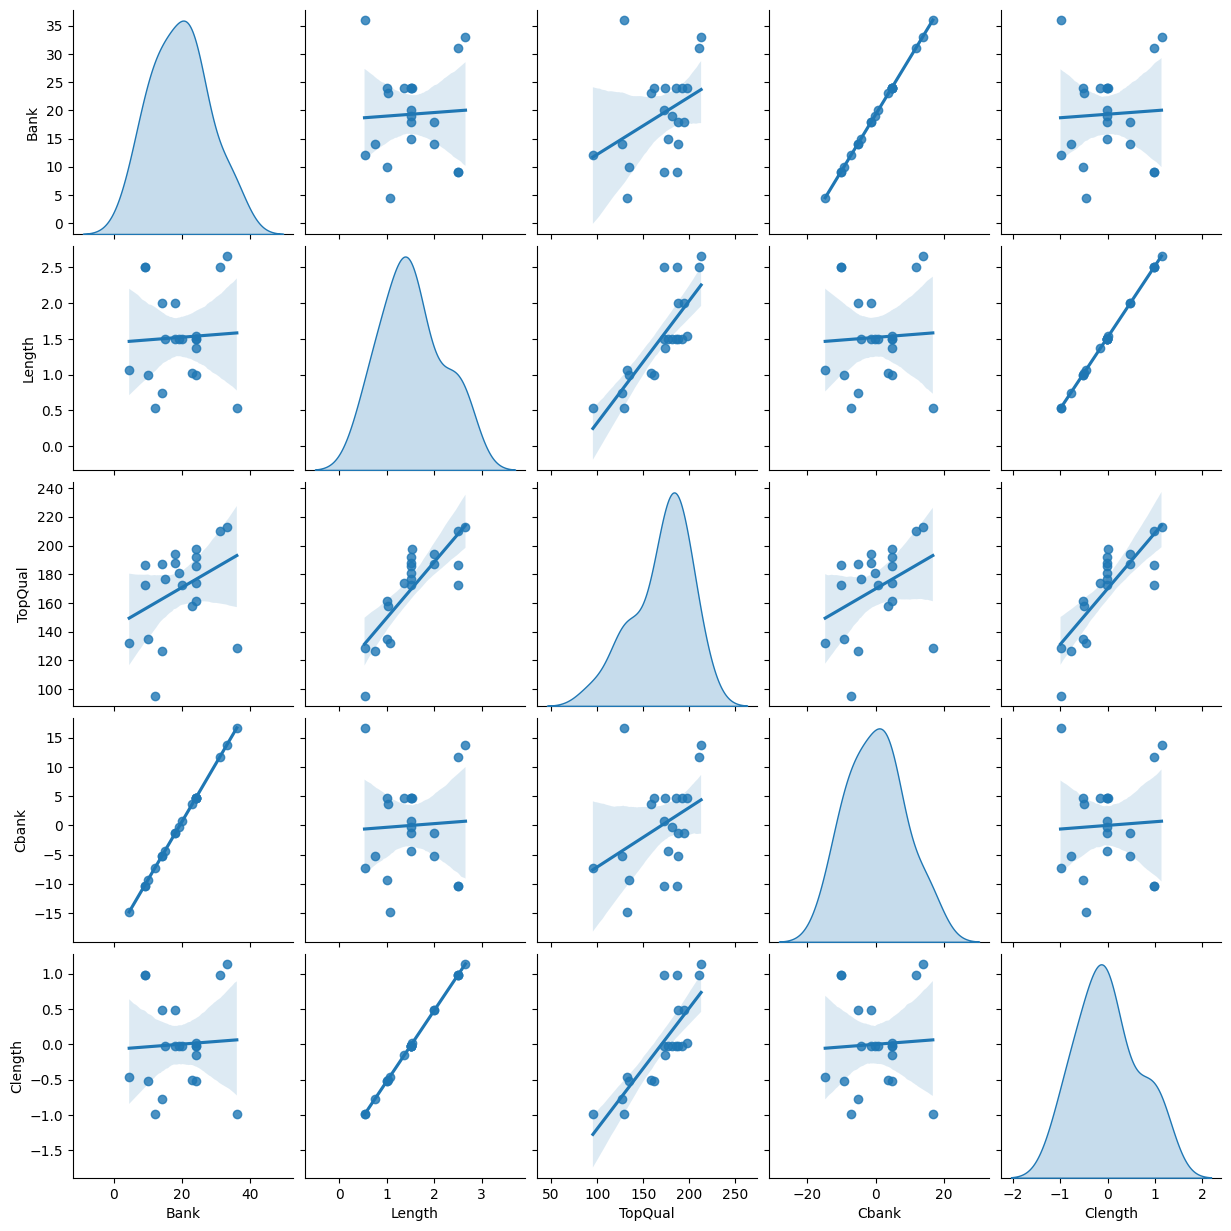

In [28]:
plt.clf()
# %matplotlib inline
sns.pairplot(data=speed, kind="reg", diag_kind='kde')

3 candidate regressers so 2^3 = 8-1 possible equations to be examined.

Find the best fitting regression model (only first -order model).

Maximize R-squared adjusted.  Minimize standard error of the regression.  Minimize AIC (Akaike information criterion).  

In general, you want predictors that are significant in the model and want the simpliest model available.

In [30]:
model1 = ols('TopQual ~ Clength', data=speed)
results1 = model1.fit()
print(results1.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.646   
Dependent Variable: TopQual          AIC:                183.3293
Date:               2024-11-15 09:52 BIC:                185.4184
No. Observations:   21               Log-Likelihood:     -89.665 
Df Model:           1                F-statistic:        37.53   
Df Residuals:       19               Prob (F-statistic): 6.87e-06
R-squared:          0.664            Scale:              330.86  
------------------------------------------------------------------
            Coef.    Std.Err.     t     P>|t|    [0.025    0.975] 
------------------------------------------------------------------
Intercept  169.9170    3.9693  42.8079  0.0000  161.6092  178.2249
Clength     38.8629    6.3434   6.1265  0.0000   25.5859   52.1399
-----------------------------------------------------------------
Omnibus:               1.809        Durbin-Watson:          1.878
Prob(Omnibus):        

In [36]:
model1 = ols('TopQual ~ Cbank', data=speed)
results1 = model1.fit()
print(results1.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.096   
Dependent Variable: TopQual          AIC:                203.0323
Date:               2024-11-15 09:56 BIC:                205.1213
No. Observations:   21               Log-Likelihood:     -99.516 
Df Model:           1                F-statistic:        3.123   
Df Residuals:       19               Prob (F-statistic): 0.0933  
R-squared:          0.141            Scale:              845.50  
------------------------------------------------------------------
            Coef.    Std.Err.     t     P>|t|    [0.025    0.975] 
------------------------------------------------------------------
Intercept  169.9140    6.3452  26.7782  0.0000  156.6332  183.1947
Cbank        1.3846    0.7835   1.7671  0.0933   -0.2554    3.0245
-----------------------------------------------------------------
Omnibus:               5.791        Durbin-Watson:          2.689
Prob(Omnibus):        

In [38]:
model1 = ols('TopQual ~ Tires', data=speed)
results1 = model1.fit()
print(results1.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.063   
Dependent Variable: TopQual          AIC:                203.7838
Date:               2024-11-15 09:57 BIC:                205.8729
No. Observations:   21               Log-Likelihood:     -99.892 
Df Model:           1                F-statistic:        2.345   
Df Residuals:       19               Prob (F-statistic): 0.142   
R-squared:          0.110            Scale:              876.31  
-----------------------------------------------------------------
                Coef.   Std.Err.    t    P>|t|   [0.025   0.975] 
-----------------------------------------------------------------
Intercept      180.2880   9.3611 19.2592 0.0000 160.6949 199.8811
Tires[T.B]     -19.8062  12.9343 -1.5313 0.1422 -46.8780   7.2656
-----------------------------------------------------------------
Omnibus:               2.543        Durbin-Watson:          2.823
Prob(Omnibus):         0.28

In [32]:
model2 = ols('TopQual ~ Clength + Cbank', data=speed)
results2 = model2.fit()
print(results2.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.752   
Dependent Variable: TopQual          AIC:                176.6949
Date:               2024-11-15 09:53 BIC:                179.8285
No. Observations:   21               Log-Likelihood:     -85.347 
Df Model:           2                F-statistic:        31.40   
Df Residuals:       18               Prob (F-statistic): 1.35e-06
R-squared:          0.777            Scale:              231.51  
------------------------------------------------------------------
            Coef.    Std.Err.     t     P>|t|    [0.025    0.975] 
------------------------------------------------------------------
Intercept  169.9176    3.3203  51.1761  0.0000  162.9420  176.8931
Clength     38.0839    5.3124   7.1688  0.0000   26.9228   49.2449
Cbank        1.2419    0.4105   3.0256  0.0073    0.3796    2.1043
-----------------------------------------------------------------
Omnibus:             

In [34]:
model3 = ols('TopQual ~ Clength + Cbank + Tires', data=speed)
results3 = model3.fit()
print(results3.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.758   
Dependent Variable: TopQual          AIC:                177.0241
Date:               2024-11-15 09:54 BIC:                181.2022
No. Observations:   21               Log-Likelihood:     -84.512 
Df Model:           3                F-statistic:        21.88   
Df Residuals:       17               Prob (F-statistic): 4.52e-06
R-squared:          0.794            Scale:              226.38  
-----------------------------------------------------------------
                Coef.   Std.Err.    t    P>|t|   [0.025   0.975] 
-----------------------------------------------------------------
Intercept      175.5933   5.8018 30.2651 0.0000 163.3525 187.8341
Tires[T.B]     -10.8358   9.1324 -1.1865 0.2517 -30.1034   8.4318
Clength         38.3344   5.2575  7.2914 0.0000  27.2420  49.4267
Cbank            0.7775   0.5639  1.3790 0.1858  -0.4121   1.9672
---------------------------

In [39]:
model3 = ols('TopQual ~ Clength + Tires', data=speed)
results3 = model3.fit()
print(results3.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.746   
Dependent Variable: TopQual          AIC:                177.2507
Date:               2024-11-15 09:57 BIC:                180.3843
No. Observations:   21               Log-Likelihood:     -85.625 
Df Model:           2                F-statistic:        30.34   
Df Residuals:       18               Prob (F-statistic): 1.72e-06
R-squared:          0.771            Scale:              237.71  
-----------------------------------------------------------------
                Coef.   Std.Err.    t    P>|t|   [0.025   0.975] 
-----------------------------------------------------------------
Intercept      180.1716   4.8756 36.9536 0.0000 169.9283 190.4149
Tires[T.B]     -19.5770   6.7367 -2.9060 0.0094 -33.7302  -5.4237
Clength         38.7892   5.3769  7.2140 0.0000  27.4927  50.0857
-----------------------------------------------------------------
Omnibus:               0.48

In [40]:
model3 = ols('TopQual ~ Cbank + Tires', data=speed)
results3 = model3.fit()
print(results3.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.056   
Dependent Variable: TopQual          AIC:                204.7942
Date:               2024-11-15 09:57 BIC:                207.9277
No. Observations:   21               Log-Likelihood:     -99.397 
Df Model:           2                F-statistic:        1.599   
Df Residuals:       18               Prob (F-statistic): 0.230   
R-squared:          0.151            Scale:              882.42  
-----------------------------------------------------------------
                Coef.   Std.Err.    t    P>|t|   [0.025   0.975] 
-----------------------------------------------------------------
Intercept      174.1891  11.4485 15.2151 0.0000 150.1368 198.2414
Tires[T.B]      -8.1619  18.0158 -0.4530 0.6559 -46.0117  29.6879
Cbank            1.0355   1.1111  0.9320 0.3637  -1.2988   3.3697
-----------------------------------------------------------------
Omnibus:               4.87

# Which model do you choose and why?

In [ ]:
# i would choose the Cbank and Clength model because it has a high R2 with a lower AIC, indicating hibh predictive power with a lower penalty for complexity

![image](table.png)

## Optional:  Plot this best fitting plane.

<Figure size 640x480 with 0 Axes>

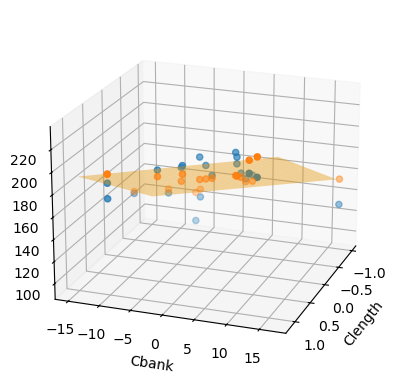

In [ ]:
plt.clf()
%matplotlib inline
#%matplotlib widget
from mpl_toolkits.mplot3d import Axes3D

fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')

x=speed['Clength']
y=speed['Cbank']
z=speed['TopQual']
plt.xlabel("Clength")
plt.ylabel("Cbank")

ax.scatter(x,y,z)
ax.view_init(elev=20.,azim=20)

ax.scatter(x.values,y.values,results4.fittedvalues.values)

x1,y1=model4.exog_names[1:]

x_surf=np.arange(speed['Clength'].min(), speed['Clength'].max())
y_surf=np.arange(speed['Cbank'].min(), speed['Cbank'].max())
xS,yS=np.meshgrid(x_surf,y_surf)

exog=pd.DataFrame({x1: xS.ravel(), y1:yS.ravel()})
zS=results4.predict(exog=exog).values.reshape(xS.shape)
ax.plot_surface(xS,yS,zS,alpha=0.4,color='orange')
plt.show()

Plot the 6-Plots for Resdiuals Checks of Asssumptions using x= Clength and y=TopQual

Comment on whether or not you are missing curvuture in the model using the first order linear model?

<Figure size 640x480 with 0 Axes>

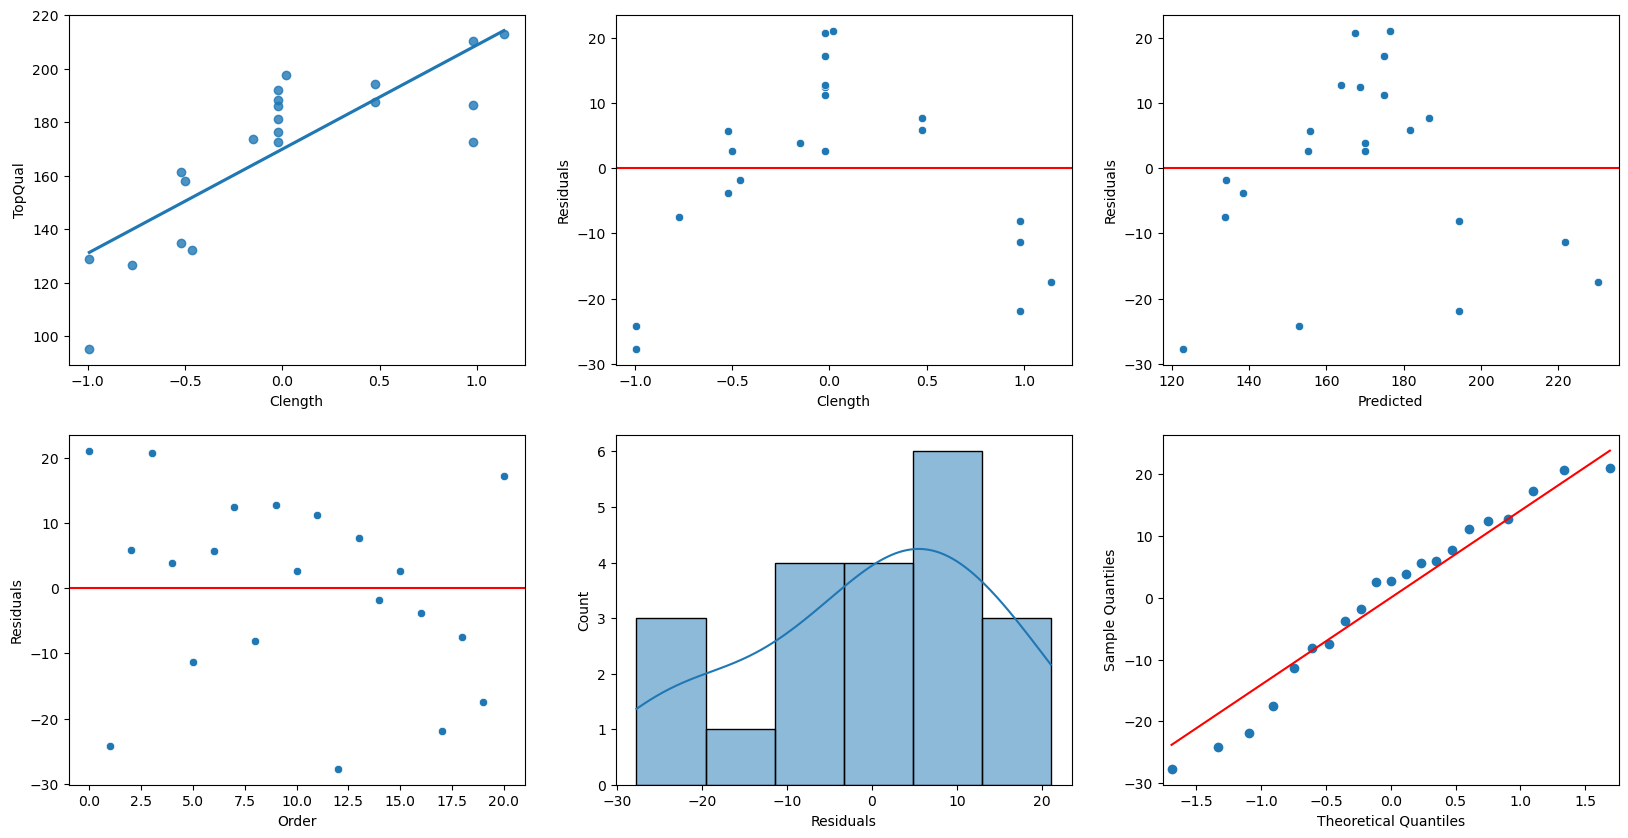

In [ ]:
plt.clf()
%matplotlib inline
import statsmodels.api as sm
#  Assumptions review with X1 and 6-plot residual review
figure, axis2 = plt.subplots(nrows=2, ncols=3)
figure.set_figheight(10)
figure.set_figwidth(20)
sns.regplot(x=speed["Clength"],y=speed["TopQual"],data=speed,ax=axis2[0,0],ci=None)
sns.scatterplot(x=(speed["Clength"]),y=results4.resid,data=speed,ax=axis2[0,1])
axis2[0,1].set_ylabel("Residuals")
axis2[0,1].axhline(y=0,color="red")
sns.scatterplot(x=results4.predict(),y=results4.resid,data=speed,ax=axis2[0,2])
axis2[0,2].set_xlabel("Predicted")
axis2[0,2].set_ylabel("Residuals")
axis2[0,2].axhline(y=0,color="red")
sns.scatterplot(x=range(0,len(speed["Clength"])) ,y=results4.resid,ax=axis2[1,0])
axis2[1,0].set_xlabel("Order")
axis2[1,0].set_ylabel("Residuals")
axis2[1,0].axhline(y=0,color="red")
sns.histplot(x=results4.resid, stat='count',kde=True,ax=axis2[1,1])
axis2[1,1].set_xlabel("Residuals")
sm.qqplot(results4.resid,line='s',ax=axis2[1,2])
plt.show()

# Part 3:  Polynomial Model Fitting

## Use polynomial regression models to find a good fitting model using Clength and Cbank.

In the ols regression string for stats models, use I before adding the polynomial term

In [44]:
model_1_Polynomial=ols('TopQual~Clength+Cbank+I(Clength*Clength)+I(Cbank*Cbank)',data=speed)
results_1_Polynomial=model_1_Polynomial.fit()
print(results_1_Polynomial.summary2())

                    Results: Ordinary least squares
Model:                 OLS                Adj. R-squared:       0.969   
Dependent Variable:    TopQual            AIC:                  134.4140
Date:                  2024-11-15 10:13   BIC:                  139.6366
No. Observations:      21                 Log-Likelihood:       -62.207 
Df Model:              4                  F-statistic:          158.7   
Df Residuals:          16                 Prob (F-statistic):   1.18e-12
R-squared:             0.975              Scale:                28.747  
------------------------------------------------------------------------
                      Coef.   Std.Err.    t     P>|t|   [0.025   0.975] 
------------------------------------------------------------------------
Intercept            182.8832   1.6556 110.4650 0.0000 179.3736 186.3929
Clength               43.8950   1.9867  22.0945 0.0000  39.6834  48.1066
Cbank                  1.4760   0.1470  10.0421 0.0000   1.1644   1.7876

In [45]:
model_1_Polynomial=ols('TopQual~Clength+I(Clength*Clength)',data=speed)
results_1_Polynomial=model_1_Polynomial.fit()
print(results_1_Polynomial.summary2())

                    Results: Ordinary least squares
Model:                OLS                Adj. R-squared:       0.800   
Dependent Variable:   TopQual            AIC:                  172.2090
Date:                 2024-11-15 10:14   BIC:                  175.3426
No. Observations:     21                 Log-Likelihood:       -83.105 
Df Model:             2                  F-statistic:          41.02   
Df Residuals:         18                 Prob (F-statistic):   1.98e-07
R-squared:            0.820              Scale:                186.98  
-----------------------------------------------------------------------
                      Coef.   Std.Err.    t    P>|t|   [0.025   0.975] 
-----------------------------------------------------------------------
Intercept            181.1394   4.1190 43.9767 0.0000 172.4857 189.7931
Clength               44.3482   4.9665  8.9294 0.0000  33.9139  54.7825
I(Clength * Clength) -28.6608   7.2516 -3.9523 0.0009 -43.8959 -13.4257
------------

In [52]:
model_1_Polynomial=ols('TopQual~Clength+I(Clength*Clength)+Cbank',data=speed)
results_1_Polynomial=model_1_Polynomial.fit()
print(results_1_Polynomial.summary2())

                    Results: Ordinary least squares
Model:                 OLS                Adj. R-squared:       0.970   
Dependent Variable:    TopQual            AIC:                  133.0433
Date:                  2024-11-15 10:19   BIC:                  137.2214
No. Observations:      21                 Log-Likelihood:       -62.522 
Df Model:              3                  F-statistic:          218.0   
Df Residuals:          17                 Prob (F-statistic):   9.18e-14
R-squared:             0.975              Scale:                27.879  
------------------------------------------------------------------------
                      Coef.   Std.Err.    t     P>|t|   [0.025   0.975] 
------------------------------------------------------------------------
Intercept            182.6521   1.5974 114.3417 0.0000 179.2819 186.0224
Clength               44.1690   1.9179  23.0305 0.0000  40.1227  48.2154
I(Clength * Clength) -32.5226   2.8257 -11.5096 0.0000 -38.4843 -26.5609

In [46]:
model_1_Polynomial=ols('TopQual~Cbank+I(Cbank*Cbank)',data=speed)
results_1_Polynomial=model_1_Polynomial.fit()
print(results_1_Polynomial.summary2())

                  Results: Ordinary least squares
Model:                OLS              Adj. R-squared:     0.139   
Dependent Variable:   TopQual          AIC:                202.8830
Date:                 2024-11-15 10:14 BIC:                206.0166
No. Observations:     21               Log-Likelihood:     -98.442 
Df Model:             2                F-statistic:        2.608   
Df Residuals:         18               Prob (F-statistic): 0.101   
R-squared:            0.225            Scale:              805.66  
-------------------------------------------------------------------
                  Coef.   Std.Err.    t    P>|t|   [0.025   0.975] 
-------------------------------------------------------------------
Intercept        177.3169   8.1619 21.7249 0.0000 160.1694 194.4645
Cbank              1.5778   0.7773  2.0298 0.0574  -0.0553   3.2109
I(Cbank * Cbank)  -0.1129   0.0810 -1.3928 0.1807  -0.2831   0.0574
------------------------------------------------------------------

## What is tbe best Polynomial regression model and why?

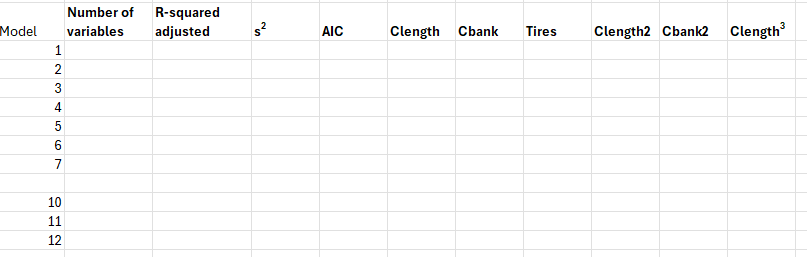

## What is the best fitting polynomial model?

The best fitted model is model 11 because is has the greatest adjusted R2 and a relative low AIC, meaning low penalty for complexity to account for overfitting

## Optional: Plot the fitted surface of the model.  

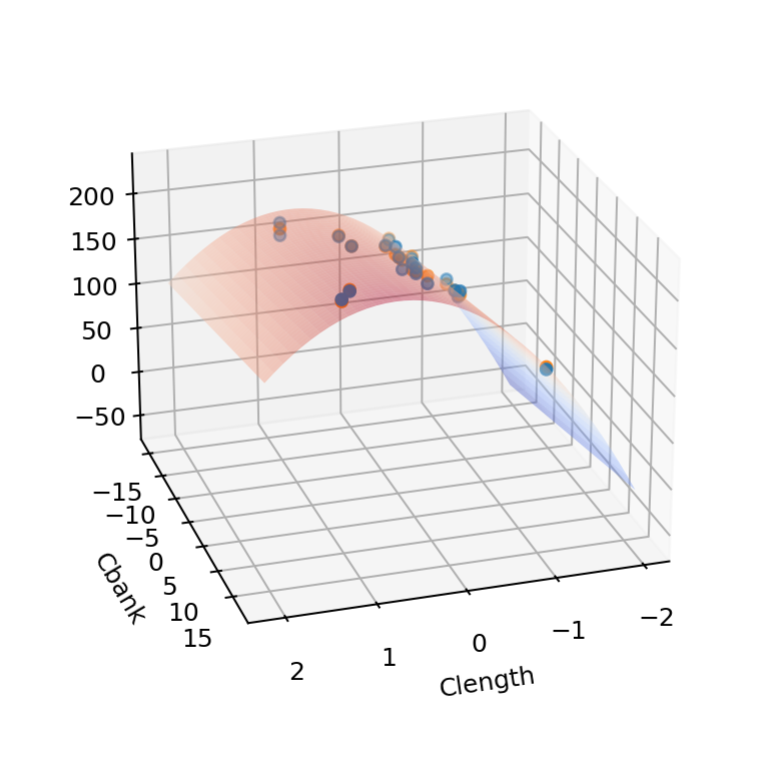

Does it appear that you are capturing the curvature of the system?

In [53]:
model11=ols('TopQual~Clength+Cbank+I(Clength*Clength)',data=speed)
results11=model11.fit()
print(results11.summary2())

                    Results: Ordinary least squares
Model:                 OLS                Adj. R-squared:       0.970   
Dependent Variable:    TopQual            AIC:                  133.0433
Date:                  2024-11-15 10:19   BIC:                  137.2214
No. Observations:      21                 Log-Likelihood:       -62.522 
Df Model:              3                  F-statistic:          218.0   
Df Residuals:          17                 Prob (F-statistic):   9.18e-14
R-squared:             0.975              Scale:                27.879  
------------------------------------------------------------------------
                      Coef.   Std.Err.    t     P>|t|   [0.025   0.975] 
------------------------------------------------------------------------
Intercept            182.6521   1.5974 114.3417 0.0000 179.2819 186.0224
Clength               44.1690   1.9179  23.0305 0.0000  40.1227  48.2154
Cbank                  1.4639   0.1437  10.1844 0.0000   1.1607   1.7672

<Figure size 640x480 with 0 Axes>

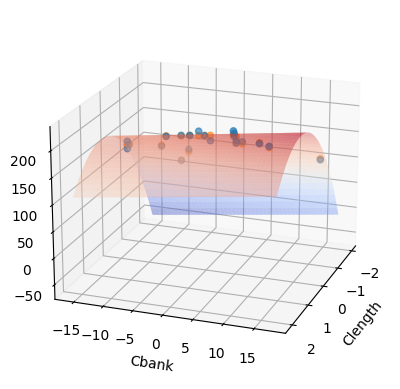

In [55]:
plt.clf()
#%matplotlib widget
#%matplotlib inline
fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')

x=speed['Clength']
y=speed['Cbank']
z=speed['TopQual']
plt.xlabel("Clength")
plt.ylabel("Cbank")

ax.scatter(x,y,z)
ax.view_init(elev=20.,azim=20)

ax.scatter(x.values,y.values,results11.fittedvalues.values)

x1,y1,yy=model11.exog_names[1:]

x_surf=np.arange(speed['Clength'].min()-1, speed['Clength'].max()+1,.1)
y_surf=np.arange(speed['Cbank'].min()-1, speed['Cbank'].max()+1,.1)
xS,yS=np.meshgrid(x_surf,y_surf)

exog=pd.DataFrame({x1: xS.ravel(), y1:yS.ravel()})
zS=results11.predict(exog=exog).values.reshape(xS.shape)
ax.plot_surface(xS,yS,zS,alpha=0.4,cmap=plt.cm.coolwarm)
plt.show()

## Optional: Plot the contour plot of the model.

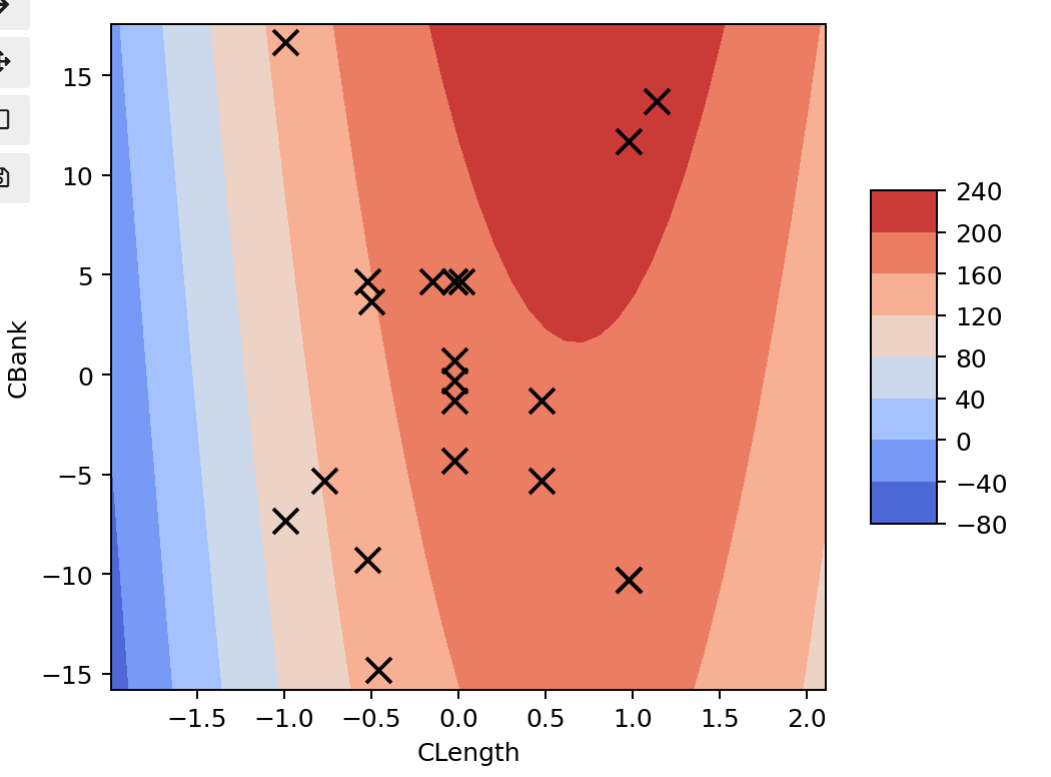

Comment on what the contour plot shows about the response model at predictor values of Clength and Cbank?

Comment on how you could attempt to find the variable values for a next experimental observation in order to optimize Qualifying Time. 

NameError: name 'xS' is not defined

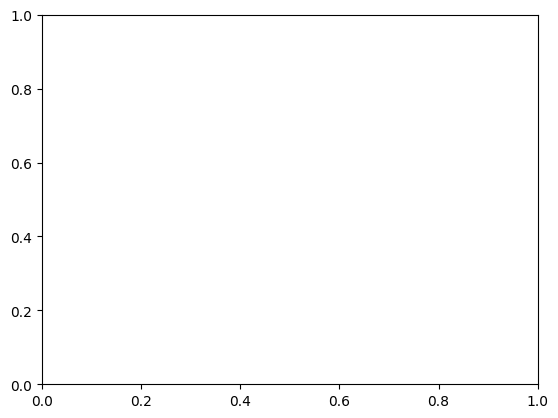

In [43]:
fig, ax = plt.subplots(1, 1)

contour=ax.contourf(xS,yS,zS,cmap="coolwarm")
fig.colorbar(contour,shrink=0.5,aspect=5)
plt.xlabel("CLength")
plt.ylabel("CBank")
ax.scatter(x,y,marker='x',color='black',s=100,label="Raw Data")